In [2]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [3]:
files = [file for file in os.listdir('./parametros')]

param = pd.DataFrame()
for file in files:
  df = pd.read_csv('./parametros/'+file)
  param = pd.concat([param, df], axis= 0)

Como los intentos pasados de la red no han salido como hemos querido, lo que se buscará aqui es tomar únicamente los valores máximos de cada 600 datos, que es una gráfica de las que obtuvimos previamente

Dividir el dataframe en 64 sub dataframes de igual longitud (600)

In [4]:
#Contiene todos los subdataframes
sub_dfs = np.array_split(param, 64)

Crear DataFrame vacío que contendrá los valores máximos

In [5]:
df_max = pd.DataFrame(columns=['Índice de absorción MAX', 'Longitud de onda MAX', 'Fracción Volumen', 'Espesor de la película (nm)', 'Radio (nm)'])

In [6]:
for i, sub_df in enumerate(sub_dfs):
    # Encontrar el valor máximo de índice de refracción y su longitud de onda correspondiente
    fila_max = sub_df.loc[sub_df['Índice de absorción'].idxmax()]
    # Imprimir el valor máximo y su correspondiente en la columna 1
    df_max = df_max.append({'Índice de absorción MAX': fila_max['Índice de absorción'], 
                            'Longitud de onda MAX': fila_max['Longitud de onda'],
                            'Fracción Volumen': fila_max['Fracvol'],
                            'Espesor de la película (nm)': fila_max['Espesor de la película (nm)'],
                            'Radio (nm)': fila_max['Radio (nm)']}, ignore_index=True)


C:\Users\PcR\AppData\Local\Temp\ipykernel_19972\2759968200.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append({'Índice de absorción MAX': fila_max['Índice de absorción'],
C:\Users\PcR\AppData\Local\Temp\ipykernel_19972\2759968200.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append({'Índice de absorción MAX': fila_max['Índice de absorción'],
C:\Users\PcR\AppData\Local\Temp\ipykernel_19972\2759968200.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append({'Índice de absorción MAX': fila_max['Índice de absorción'],
C:\Users\PcR\AppData\Local\Temp\ipykernel_19972\2759968200.py:5: FutureWarning: The frame.append method is deprecated and will be removed from panda

In [7]:
df_max

,Índice de absorción MAX,Longitud de onda MAX,Fracción Volumen,Espesor de la película (nm),Radio (nm)
0,0.016685,301.0,1.0,100.0,10.0
1,0.016949,301.0,1.0,105.0,10.0
2,0.017202,301.0,1.0,110.0,10.0
3,0.017405,301.0,1.0,115.0,10.0
4,0.017537,301.0,1.0,120.0,10.0
...,...,...,...,...,...
59,0.017540,301.0,1.0,120.0,5.0
60,0.017539,301.0,1.0,120.0,6.0
61,0.017539,301.0,1.0,120.0,7.0
62,0.017538,301.0,1.0,120.0,8.0


In [8]:
# Seleccionar las columnas de entrada y salida
entrada = ['Fracción Volumen', 'Radio (nm)', 'Espesor de la película (nm)']
salida = ['Longitud de onda MAX', 'Índice de absorción MAX']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_max[entrada], df_max[salida], test_size=0.2, random_state=42)

In [9]:
# Crear objetos StandardScaler para normalizar los datos de entrada y salida
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Ajustar los objetos scaler a los datos de entrenamiento
scaler_X.fit(X_train)
scaler_y.fit(y_train)

# Aplicar la normalización a los datos de entrenamiento y prueba
X_train_norm = scaler_X.transform(X_train)
X_test_norm = scaler_X.transform(X_test)
y_train_norm = scaler_y.transform(y_train)
y_test_norm = scaler_y.transform(y_test)

In [10]:
# Definir la estructura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)
])

# Compilar la red neuronal
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [11]:
history = model.fit(X_train_norm, y_train_norm, epochs=1000, batch_size=4, validation_split=0.2)

Epoch 1/1000
10/10 [==============================] - 1s 16ms/step - loss: 0.1569 - val_loss: 0.2651
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1362 - val_loss: 0.2331
Epoch 3/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1213 - val_loss: 0.2023
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1086 - val_loss: 0.1708
Epoch 5/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0944 - val_loss: 0.1432
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0793 - val_loss: 0.1206
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0667 - val_loss: 0.0959
Epoch 8/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0556 - val_loss: 0.0748
Epoch 9/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0469 - val_loss: 0.0571
Epoch 10/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.043

In [12]:
# Evaluar el rendimiento de la red neuronal
y_pred_norm = model.predict(X_test_norm)
loss = model.evaluate(X_test_norm, y_test_norm)

# Desnormalizar los resultados finales
y_pred_denorm = scaler_y.inverse_transform(y_pred_norm)
y_test_denorm = scaler_y.inverse_transform(y_test_norm)

1/1 [==============================] - 0s 18ms/step - loss: 0.0013


In [13]:
pd.DataFrame(y_test_denorm)

,0,1
0,301.0,0.017555
1,301.0,0.017560
2,301.0,0.016685
3,301.0,0.017545
4,301.0,0.017601
5,301.0,0.017538
6,549.0,0.084735
7,301.0,0.016461
8,548.0,0.026177
9,301.0,0.017539


In [14]:
pd.DataFrame(y_pred_denorm)

,0,1
0,287.616547,0.019466
1,285.527191,0.019517
2,298.917847,0.017975
3,290.371277,0.018894
4,299.834229,0.018982
5,297.894531,0.019093
6,563.063110,0.085731
7,297.136047,0.017573
8,578.481628,0.025672
9,302.116455,0.019259


In [15]:
# Calcular el error medio absoluto (MAE)
mae = mean_absolute_error(y_test_denorm, y_pred_denorm)
print('MAE:', mae)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
print('MSE:', mse)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test_denorm, y_pred_denorm)
print('R^2:', r2)

MAE: 4.753280053923443
MSE: 77.53838780222412
R^2: 0.9871083314177679


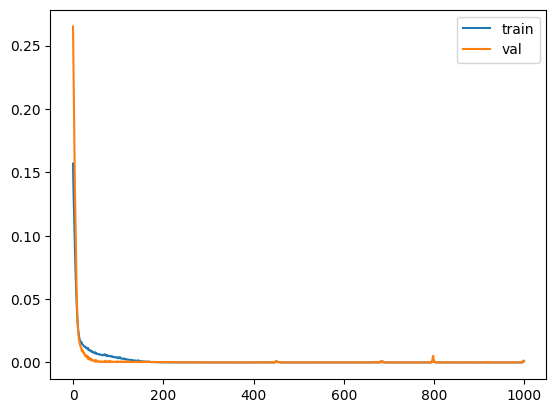

In [16]:
# Graficar la evolución del error a través de las épocas
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

# Guardando la red

In [17]:
model.save('Longitud de onda e indice de absorcion MAX.h5')